We'll be answering the following questions along the way:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
# Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)
    
# Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,114.787470,115.870474,113.569210,114.729644,4.864328e+07,113.665309
std,11.115561,10.945278,11.194649,11.016722,2.089539e+07,10.397615
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.269997,108.699997,105.650002,106.820000,3.448560e+07,106.651287
50%,115.290001,116.489998,113.989998,115.129997,4.452590e+07,113.901733
75%,125.720001,126.470001,124.820000,125.610001,5.528090e+07,123.661570
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-04-07 to 2016-04-06
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


 let's go ahead and plot out the volume and closing price of the stocks

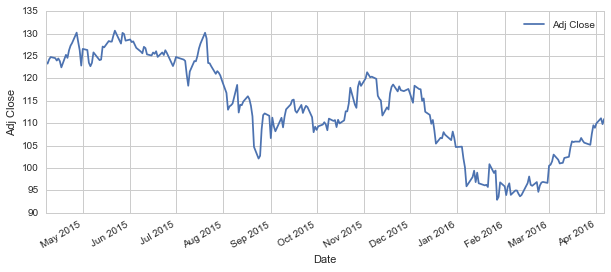

In [5]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))
plt.ylabel('Adj Close')

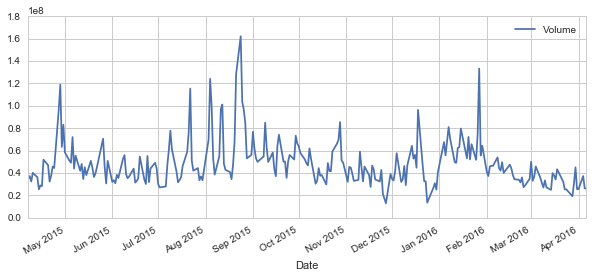

In [6]:
AAPL['Volume'].plot(legend = True, figsize=(10,4))

let's go ahead and caculate the moving average for the stock

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    col_name = 'SMA for %s days' %(str(ma))
    # AAPL[col_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[col_name] = AAPL['Adj Close'].rolling(ma).mean()

AAPL.head()    

,Open,High,Low,Close,Volume,Adj Close,SMA for 10 days,SMA for 20 days,SMA for 50 days
Date,,,,,,,,,
2015-04-07,127.639999,128.119995,125.980003,126.010002,35012300,123.716630,NaN,NaN,NaN
2015-04-08,125.849998,126.400002,124.970001,125.599998,37329200,123.314088,NaN,NaN,NaN
2015-04-09,125.849998,126.580002,124.660004,126.559998,32484000,124.256616,NaN,NaN,NaN
2015-04-10,125.949997,127.209999,125.260002,127.099998,40188000,124.786789,NaN,NaN,NaN
2015-04-13,128.369995,128.570007,126.610001,126.849998,36365100,124.541339,NaN,NaN,NaN


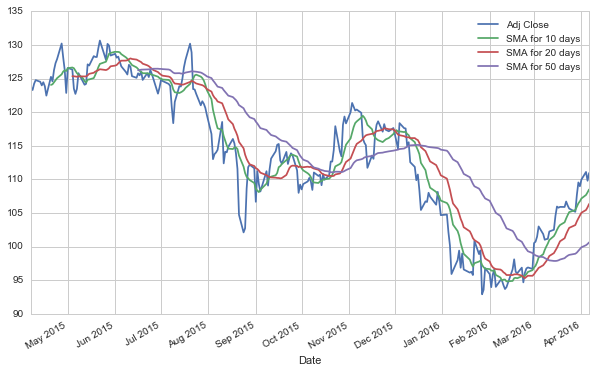

In [8]:
AAPL[['Adj Close', 'SMA for 10 days', 'SMA for 20 days', 'SMA for 50 days']].plot(figsize=(10,6))

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [9]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,SMA for 10 days,SMA for 20 days,SMA for 50 days,Daily Return
Date,,,,,,,,,,
2015-04-07,127.639999,128.119995,125.980003,126.010002,35012300,123.716630,NaN,NaN,NaN,NaN
2015-04-08,125.849998,126.400002,124.970001,125.599998,37329200,123.314088,NaN,NaN,NaN,-0.003254
2015-04-09,125.849998,126.580002,124.660004,126.559998,32484000,124.256616,NaN,NaN,NaN,0.007643
2015-04-10,125.949997,127.209999,125.260002,127.099998,40188000,124.786789,NaN,NaN,NaN,0.004267
2015-04-13,128.369995,128.570007,126.610001,126.849998,36365100,124.541339,NaN,NaN,NaN,-0.001967


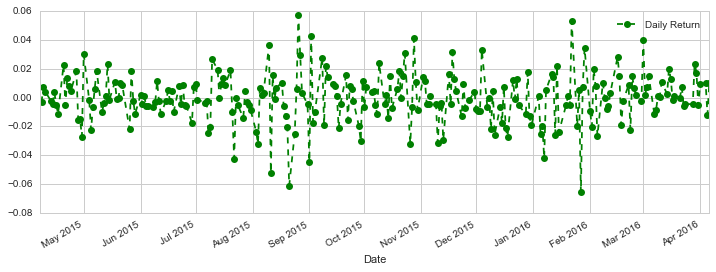

In [10]:
AAPL['Daily Return'].plot(figsize=(12,4),linestyle='--',marker='o',color='g',legend = True)

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

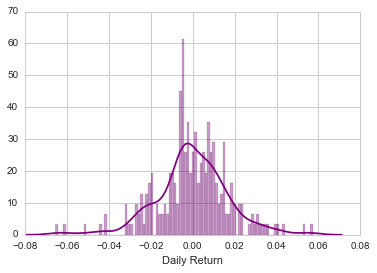

In [11]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color='purple')

Now what if we wanted to analyze the returns of all the stocks in our list?

In [12]:
closing_df = AAPL['Adj Close']
closing_df = DataFrame(closing_df)
closing_df.columns = ['AAPL']

closing_df['GOOG'] = GOOG['Adj Close']
closing_df['MSFT'] = MSFT['Adj Close']
closing_df['AMZN'] = AMZN['Adj Close']

closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2015-04-07,123.716630,537.022404,40.426821,374.410004
2015-04-08,123.314088,541.612446,40.319742,381.200012
2015-04-09,124.256616,540.782472,40.378149,383.540009
2015-04-10,124.786789,540.012416,40.611776,382.649994
2015-04-13,124.541339,539.172466,40.650711,382.359985


In [13]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2015-04-07,NaN,NaN,NaN,NaN
2015-04-08,-0.003254,0.008547,-0.002649,0.018135
2015-04-09,0.007643,-0.001532,0.001449,0.006139
2015-04-10,0.004267,-0.001424,0.005786,-0.002321
2015-04-13,-0.001967,-0.001555,0.000959,-0.000758


Now we can compare the daily percentage return of two stocks to check how correlated.

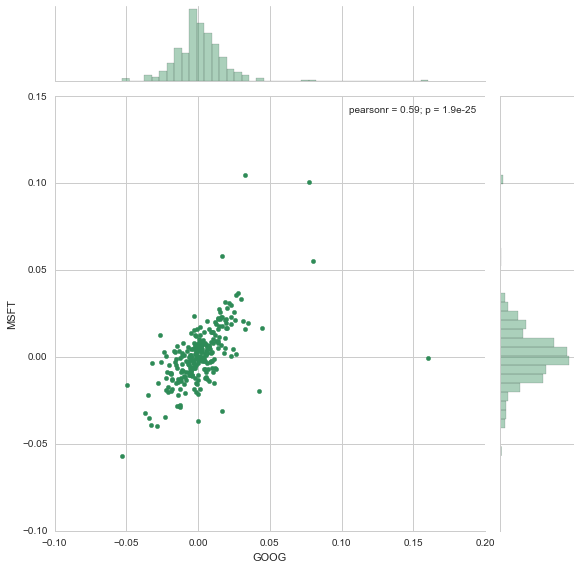

In [14]:
# Google vs. Microsoft
sns.jointplot('GOOG','MSFT', data = tech_rets.dropna() ,kind = 'scatter', color='seagreen', size=8)

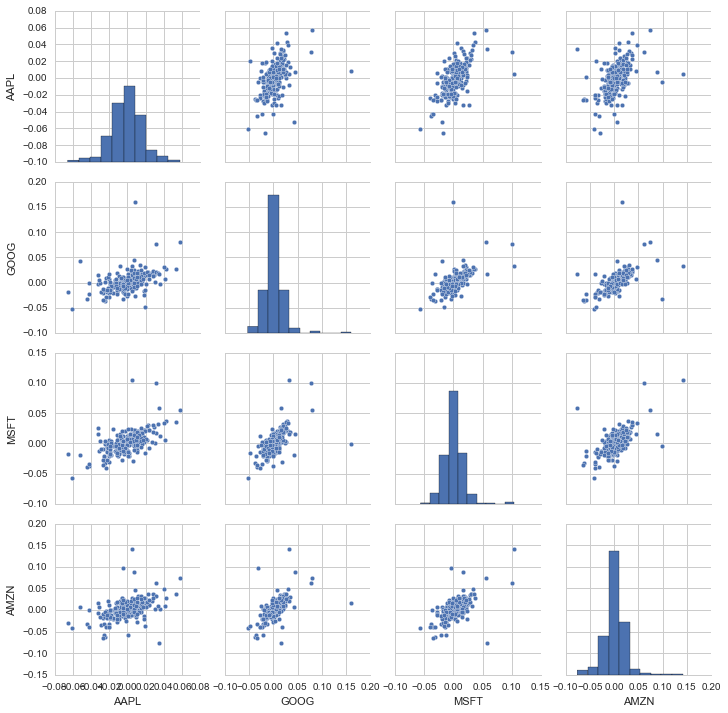

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

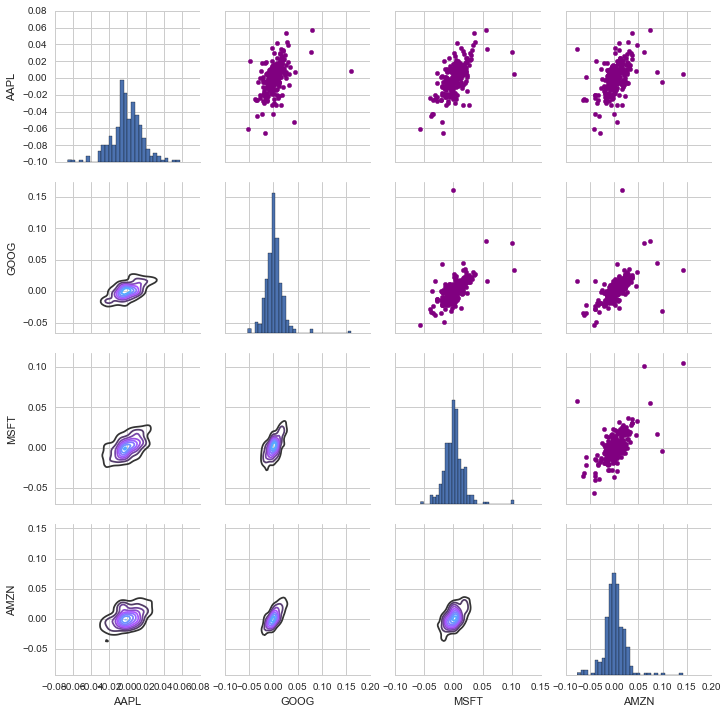

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins = 30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

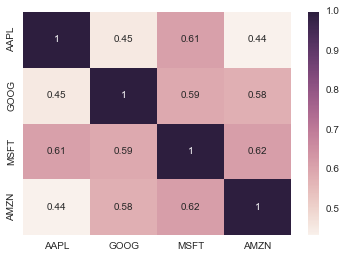

In [18]:
# plot correlation matrix
corrmat = tech_rets.dropna().corr()

sns.heatmap(corrmat,annot=True)

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

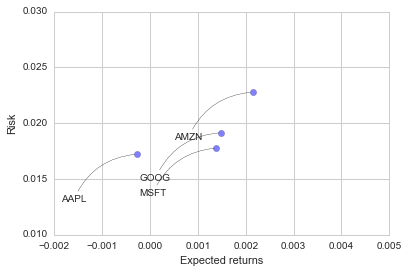

In [19]:
tech_rets_clean = tech_rets.dropna()

plt.scatter(tech_rets_clean.mean(), tech_rets_clean.std(), alpha = 0.5, s = 40)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.xlim([-0.002,0.005])
plt.ylim([0.01,0.03])

for label, x, y in zip(tech_rets_clean.columns, tech_rets_clean.mean(), tech_rets_clean.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-50, -50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))

In [20]:
tech_rets_clean.columns

Index([u'AAPL', u'GOOG', u'MSFT', u'AMZN'], dtype='object')

### Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

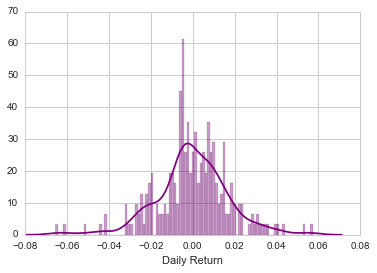

In [22]:
# Using AAPL as an example:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [24]:
# The 0.05 empirical quantile of daily returns
tech_rets_clean['AAPL'].quantile(0.05)

-0.026870597580305255

The 0.05 empirical quantile of daily returns is at -0.027. That means that with 95% confidence, our worst daily loss will not exceed 2.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.027 * 1,000,000 = $27,000.

#### Value at Risk using the Monte Carlo method

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements. This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can rearrange the above formula:

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [84]:
from IPython.display import Image
Image(url='http://i.investopedia.com/inv/articles/site/CT-MonteCarlo3ra.gif')

Where to start:
    
1. Specify a model (e.g. geometric Brownian motion)
2. Generate random trials 
3. Process the output

More detials: http://www.investopedia.com/articles/07/montecarlo.asp

In [79]:
days = 365

# dt: time
dt = 1/days

# mu: returns
mu = tech_rets.mean()['GOOG']

# sigma: std
sigma = tech_rets_clean.std()['GOOG']

# start price
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2015-04-07,123.716630,537.022404,40.426821,374.410004
2015-04-08,123.314088,541.612446,40.319742,381.200012
2015-04-09,124.256616,540.782472,40.378149,383.540009
2015-04-10,124.786789,540.012416,40.611776,382.649994
2015-04-13,124.541339,539.172466,40.650711,382.359985


In [82]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Shock
        #shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        epsilon = np.random.randn(1)[0]
        shock[x] = epsilon * sigma * np.sqrt(dt)
        
        # Calculate Drift, which is a constant(most simple)
        drift[x] = mu * dt
        
        # Calculate Price: s(t) = s(t-1) + s(t-1)*(drift + shock)
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

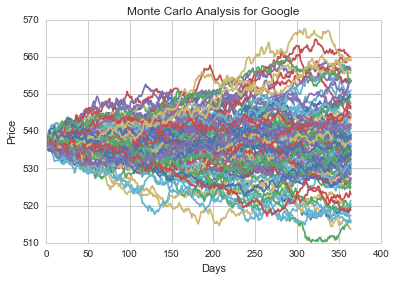

In [86]:
start_price = 537.02

# 100 simulation trials
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')
plt.figure(figsize=(30,30))

Now that we have our array of simulations, we can go ahead and plot a histogram,as well as use qunatile to define our risk for this stock.

In [95]:
# Simulate 200 trials
runs = 1000
simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]# 200 trials for the last point

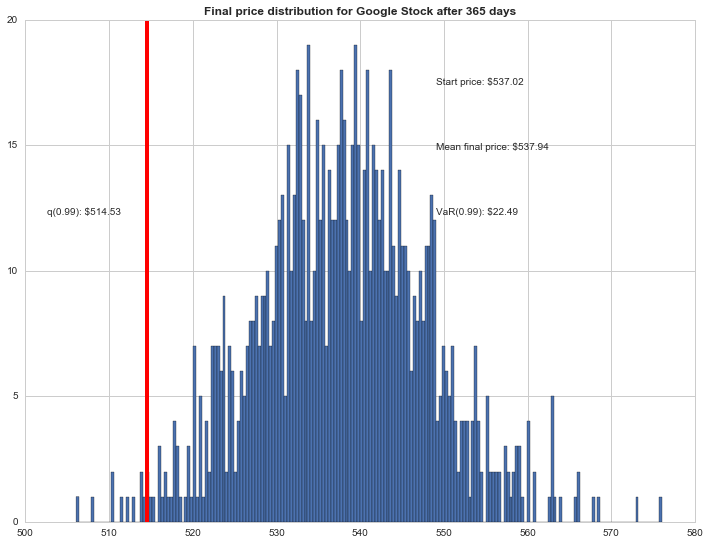

In [98]:
q = np.percentile(simulations, 1) # 1% quantile -- 99% CI

plt.hist(simulations, bins = 200)

# Starting Price
plt.figtext(0.6, 0.8, "Start price: $%.2f" % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 29
plt.rcParams["figure.figsize"] = fig_size